# Support Vector Classifier

In [1]:
library('e1071')

## Generate some observations and check are they linearly separable

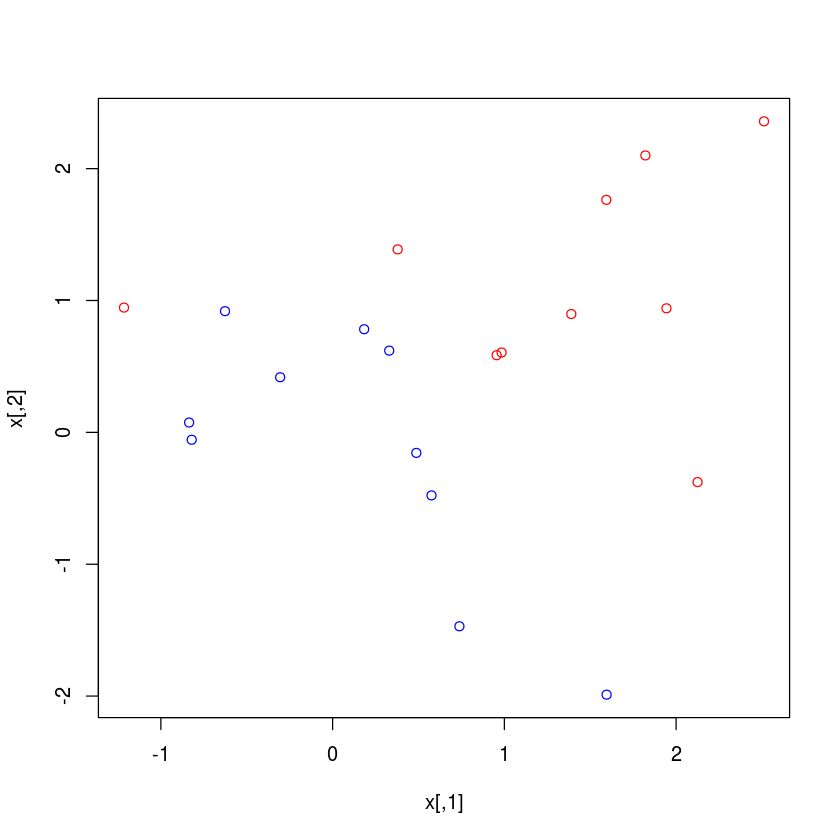

In [7]:
set.seed(1)
x = matrix(rnorm(20*2),ncol=2)
y = c(rep(-1,10),rep(1,10))
x[y==1,] = x[y==1,] +1
plot(x,col=(3-y))

In [10]:
# In order to use SVM to perform classification (as opposed to SVM based regression), we must encode the response as a factor variable.
dat = data.frame(x=x, y= as.factor(y))
svm.fit = svm(y~., data=dat, kernel="linear", cost=10, scale=FALSE)
summary(svm.fit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




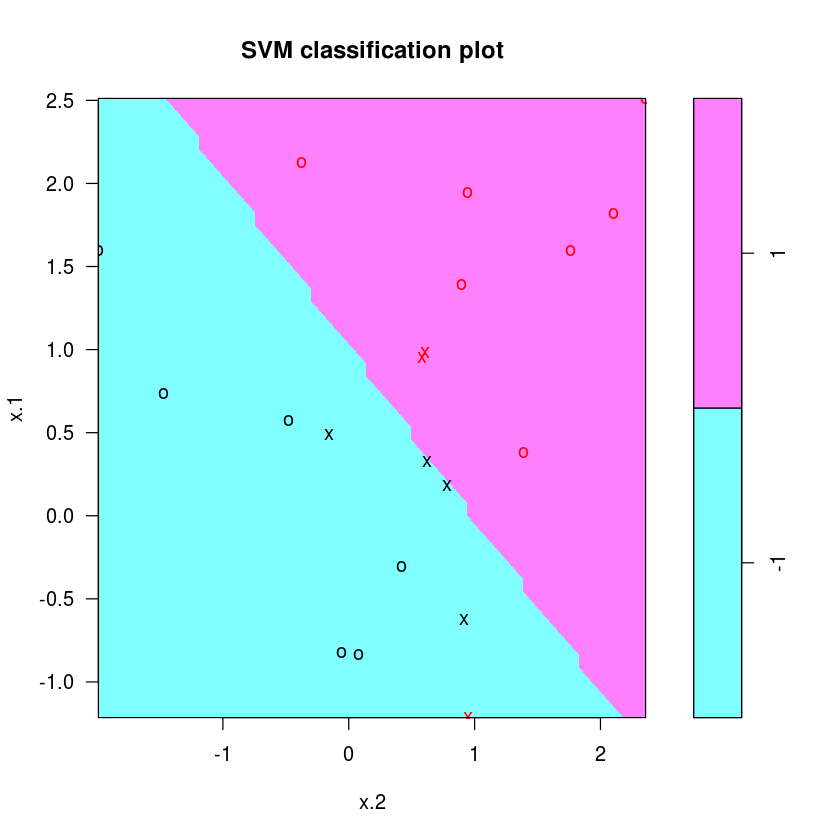

In [11]:
plot(svm.fit,dat)

#### Support Vectors are plotted as crosses and other observation are plotted as circle.

In [12]:
names(svm.fit)

[1] "call"            "type"            "kernel"          "cost"           
 [5] "degree"          "gamma"           "coef0"           "nu"             
 [9] "epsilon"         "sparse"          "scaled"          "x.scale"        
[13] "y.scale"         "nclasses"        "levels"          "tot.nSV"        
[17] "nSV"             "labels"          "SV"              "index"          
[21] "rho"             "compprob"        "probA"           "probB"          
[25] "sigma"           "coefs"           "na.action"       "fitted"         
[29] "decision.values" "terms"

In [14]:
# Support Vectors
svm.fit$index

[1]  1  2  5  7 14 16 17

## What will happen for smaller value of cost ?


Call:
svm(formula = y ~ ., data = dat, cost = 0.1, kernel = "linear", scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

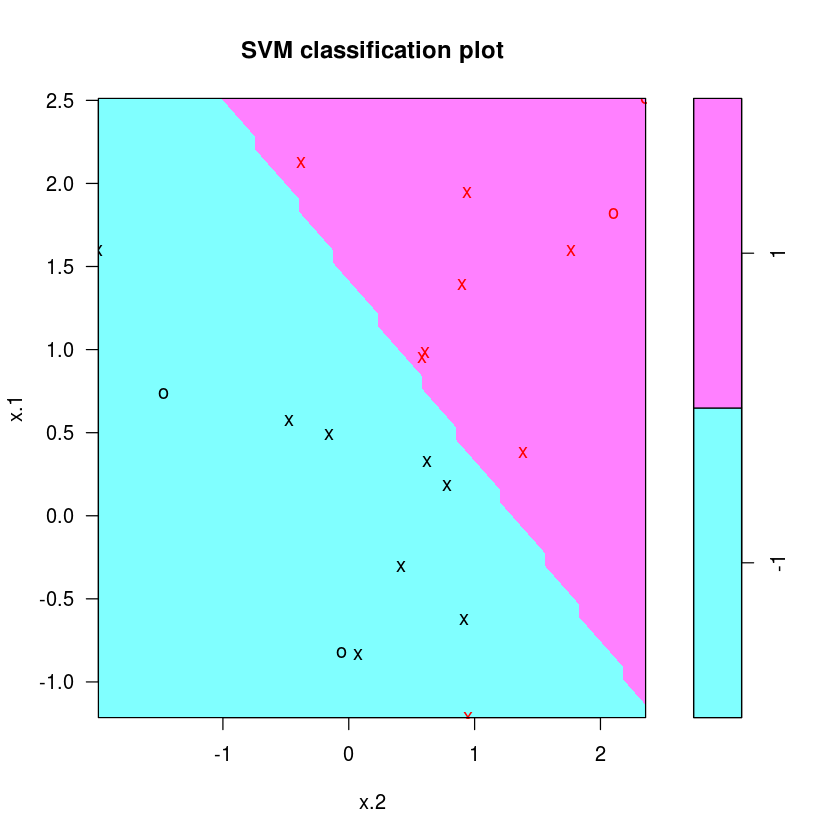

In [16]:
svm.fit = svm(y~., data=dat, cost=0.1, kernel="linear", scale=FALSE)
summary(svm.fit)
plot(svm.fit,dat)
svm.fit$index

### As expected number of support vector increaed, thus variance decreased.

#### The svm() function does not explicitly output the coefficients of the linear decision boundary obtained when the support vector classifier is fit, nor does it output the widht of the margin. 

## How to select best value of cost ?

In [17]:
# tune() function perfoms 10 fold cross validation on models of interest.
set.seed(1)
tune.out = tune(svm,y~.,data=dat, kernel="linear", ranges=list(cost=c(0.001,0.01,0.1,1,5,10,100)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [18]:
names(tune.out)

[1] "best.parameters"  "best.performance" "method"           "nparcomb"        
[5] "train.ind"        "sampling"         "performances"     "best.model"

In [20]:
bestmodel = tune.out$best.model
summary(bestmodel)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




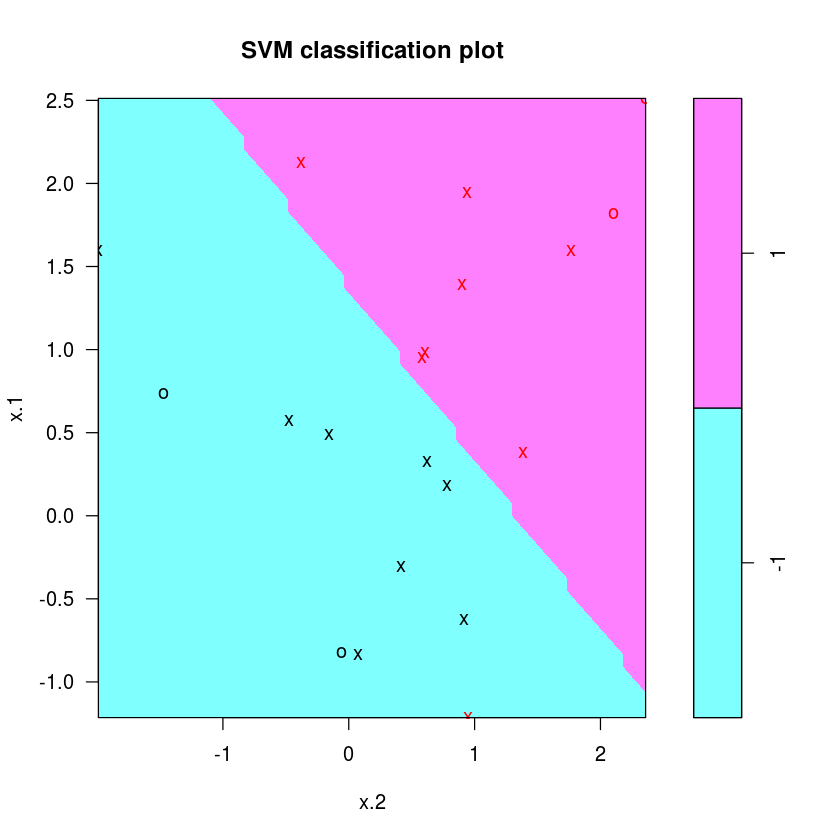

In [21]:
plot(bestmodel,dat)

## Generate Test Data & predict using Best Model

In [32]:
xtest = matrix(rnorm(20*2), ncol=2)
ytest = sample(c(-1,1),20,rep=TRUE)
xtest[ytest==1,] = xtest[ytest==1,] +1
testdata = data.frame(x=xtest,y=as.factor(ytest))

In [33]:
ypred = predict(bestmodel,testdata )
table(predict=ypred,truth=testdata$y)

       truth
predict -1 1
     -1  7 3
     1   2 8

In [35]:
## Test Error
11/20

[1] 0.55

## 55% are misclassified. To enhance this we can use non linear classifier as data seems not be linraly classifiable.